In [1]:
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy
import random

In [2]:
train_data = idx2numpy.convert_from_file('mnistdata/train-images.idx3-ubyte') / 255
train_label = idx2numpy.convert_from_file('mnistdata/train-labels.idx1-ubyte')
test_data = idx2numpy.convert_from_file('mnistdata/t10k-images.idx3-ubyte') / 255
test_label = idx2numpy.convert_from_file('mnistdata/t10k-labels.idx1-ubyte')

In [3]:
train_label.shape

(60000,)

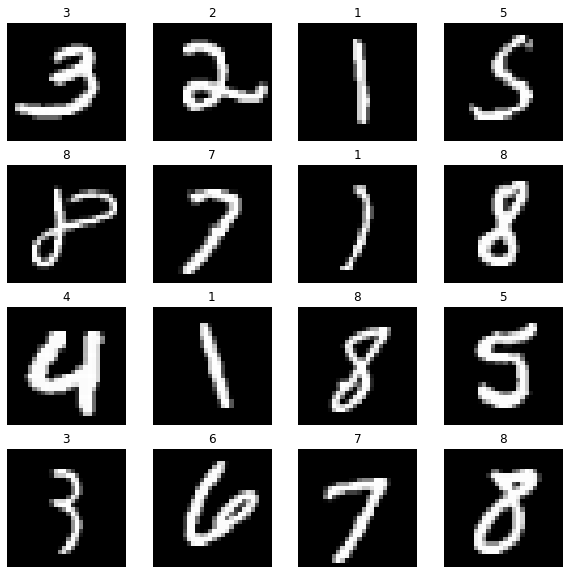

In [4]:
row , col = 4, 4
figure  = plt.figure(figsize=(10,  10))
for i in range(1, row*col+1):
    index = random.randint(1, len(train_data))
    img = train_data[index]
    label = train_label[index]
    figure.add_subplot(row, col, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img, cmap='gray')

In [5]:
def vactorize_label(*labels):
    out = []
    for label in labels:
        label = label.tolist()
        for i , val in enumerate(label):
            label_list = np.zeros(10, dtype=int)
            label_list[val] = 1
            label[i] = label_list
        label = np.array(label, dtype=object)
        out.append(label)
    return out

train_label, test_label=vactorize_label(train_label, test_label)

def data_loader_wrapper(train_data, train_label, test_data, test_label):
    train_data = [np.float32(x.reshape(784, 1)) for x in train_data]
    test_data = [np.float32(x.reshape(784, 1)) for x in test_data]
    train_label = [x.reshape(10,1) for x in train_label]
    test_label = [x.reshape(10,1) for x in test_label]
    training_data = [(data, label) for data, label in zip(train_data, train_label)]
    testing_data = [(data,label) for data, label in zip(test_data, test_label)]
    return training_data, testing_data

training_data, testing_data = data_loader_wrapper(train_data, train_label, test_data, test_label)

In [6]:
def sigmoid(z):
    return (1.0/(1.0+np.exp(-z.astype(float))))

def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z)) 

In [17]:
class Network:

    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
       
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for i, mini_batch in enumerate(mini_batches):
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print ("Epoch {0}: {1} / {2}".format(
                    j, self.evaluate(test_data), n_test))
            else:
                print ("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for i, (x, y) in enumerate(mini_batch):
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):

        test_results = [((self.feedforward(x).argmax()), y.argmax())
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        return (output_activations-y)

In [19]:
net = Network([784, 16, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=testing_data)

0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini b

0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini b

0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini b

1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini b

0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini b

0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini b

3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini b

7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini b

1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini b

0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini b

9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini b

1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini b

2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini b

8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini b

0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini b

3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini b

2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini b

8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini b

5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini b

5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini b

3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini b

4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini b

0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini b

0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini b

6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini b

5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini b

1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini b

4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini b

3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini b

2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini b

3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini b

7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini b

1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini b

5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini b

8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini b

5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini b

4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini b

1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini b

9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini b

9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini b

1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini b

5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini b

6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini b

3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini b

3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini b

9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini b

9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini b

9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini b

1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini b

8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini b

2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini b

1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini b

0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini b

4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini b

8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini b

1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini b

7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini b

0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini b

0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini b

8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini b

9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini b

2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini b

0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini b

5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini b

4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini b

1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini b

3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini b

0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini b

8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini b

8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini b

6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini b

9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini b

9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini b

1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini b

1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini b

1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini b

0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini b

0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini b

1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini b

9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini b

6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini b

5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini b

0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini b

3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini b

2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini b

1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini b

3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini b

7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini b

6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini b

4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini b

0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini b

4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini b

0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini b

4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini b

2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini b

2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini b

7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini b

9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini b

2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini b

0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini b

6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini b

6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini b

0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini b

0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini batch complete
6th mini batch  of mini batch complete
7th mini batch  of mini batch complete
8th mini batch  of mini batch complete
9th mini batch  of mini batch complete
0th mini batch  of mini batch complete
1th mini batch  of mini batch complete
2th mini batch  of mini batch complete
3th mini batch  of mini batch complete
4th mini batch  of mini batch complete
5th mini batch  of mini b

KeyboardInterrupt: 